<a href="https://colab.research.google.com/github/alyssonfa/datasciencepucrio/blob/main/MVP_Alysson_Araujo_Engenharia_de_dados_Acordos_judiciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Engenharia de Dados**

## Aluno: Alysson de Farias de Araujo

### Análise de Acordos Judiciais e Extrajudiciais de uma empresa de distribuição de combustíveis

## 1. Introdução

Trata-se de trabalho de fechamento do módulo de Engenharia de dados, do MBA em Ciência de Dados e Analytics, promovido pela Pontifícia Universidade Católica do Rio de Janeiro

Para mais detalhes sobre o dataset, consulte: https://github.com/alyssonfa/datasciencepucrio/blob/main/Dataset%20-%20Recupera%C3%A7%C3%A3o%20de%20Cr%C3%A9dito%20-%20Distribuidora%20de%20Combust%C3%ADveis%20-%20Vf.csv

Versão raw: https://raw.githubusercontent.com/alyssonfa/datasciencepucrio/main/Dataset%20-%20Recupera%C3%A7%C3%A3o%20de%20Cr%C3%A9dito%20-%20Distribuidora%20de%20Combust%C3%ADveis%20-%20Vf.csv


### 1.1. Contextualização geral do dataset utilizado
O dataset utilizado neste MPV será o “Dataset - Recuperação de Crédito - Distribuidora de Combustíveis”, proveniente de uma adaptação de uma Planilha de Dados de Recuperação de Crédito da empresa para a qual trabalho atualmente.

### 1.2. Objetivo e problemas propostos
O objetivo do presente trabalho é observar a lista de acordos jurídicos/financeiros realizados em determinado ano, referente a uma carteira de clientes. A análise será voltada a responder perguntas pré-definidas conforme a seguir:

1.	Qual a porcentagem de acordos realizados, em comparação com os não realizados?
2.	Qual a região que apresenta o maior somatório financeiro em valores de acordos bem-sucedidos?
3.	Quais estados apresentam, respectivamente, o maior e o menor tempo para finalização de uma negociação de acordo?
4.	Qual a relação entre a existência de garantias contratuais e o sucesso de uma negociação?

## 2. Coleta de dados
O arquivo do dataset foi baixado do banco de dados interno da empresa, com dados que já foram consolidados e divulgados ao mercado. Por questões de ética e proteção de dados, os nomes de empresas e valores envolvidos foram devidamente anonimizados e randomizados conforme a lógica comercial envolvida.
Deste modo, não foi necessária uma etapa de coleta de dados automatizada, por exemplo, por meio de construção de robôs de coleta, tendo em vista que as informações foram coletadas ‘on the job’, conforme o ano exercício determinado, e resultaram em uma planilha com dados já bem ajustados.


## 3. Modelagem
Apresento abaixo um catálogo de dados contendo a descrição detalhada dos dados:

a)	CLIENTE - Nome do cliente;

b)	ESTADO - Estado do Brasil que se localiza o cliente;

c)	REGIAO - Região do Brasil que se localiza o cliente - Aqui, entenderemos São Paulo como uma região a parte, tendo em vista que concentra grande parte dos clientes da empresa, necessitando de um tratamento particular, fora das demais regiões. Dessa forma SUDESTE e SÃO PAULO são regiões independentes, para fins dessa análise;

d)	VALOR - Valor do acordo financeiro (em reais - R$);

e)	STATUS - Se o estabelecimento está ativo ou já foi desativado;

f)	DURACAO_PROC - Duração do processo judicial em trâmite (em meses);

g)	FASE_PROC - Face processual na qual o processo se encontrava quanto o acordo começou a ser negociado;

h)	GARANTIA - Se o contrato com o cliente tinha alguma garantia financeira, qualquer que seja sua natureza;

i)	RESULTADO - Se o acordo foi realizado ou não;

j)	TEMPO - O tempo que a negociação de acordo durou (em meses);

## 4. Carga
Nesta etapa, será feita a carga dos dados para o Data Warehouse, com utilização de pipelines de ETL (Extração, Transformação e Carga). Nesse caso, utilizamos a plataforma Databricks, e foram documentados os processos a seguir.

### 4.1. Confirguação do ambiente: Configuração do cluster no Databricks
Conforme imagem abaixo, configurei um Cluster específico para esse MPV:
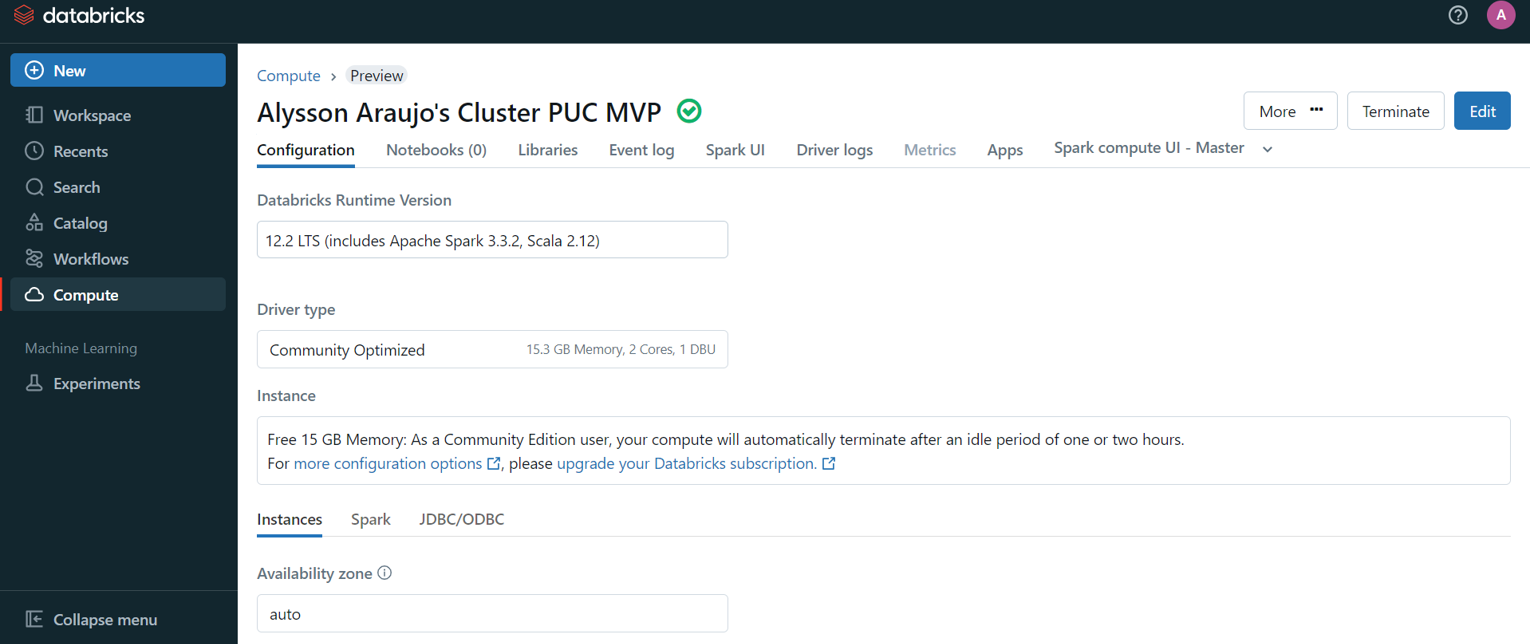

###4.2. Extração dos Dados
Para o upload do dataset em CSV, foi utilizada a opção Create Table with UI, com upload direto do arquivo já disponível em minha máquina (e no github, cf. já indicado):
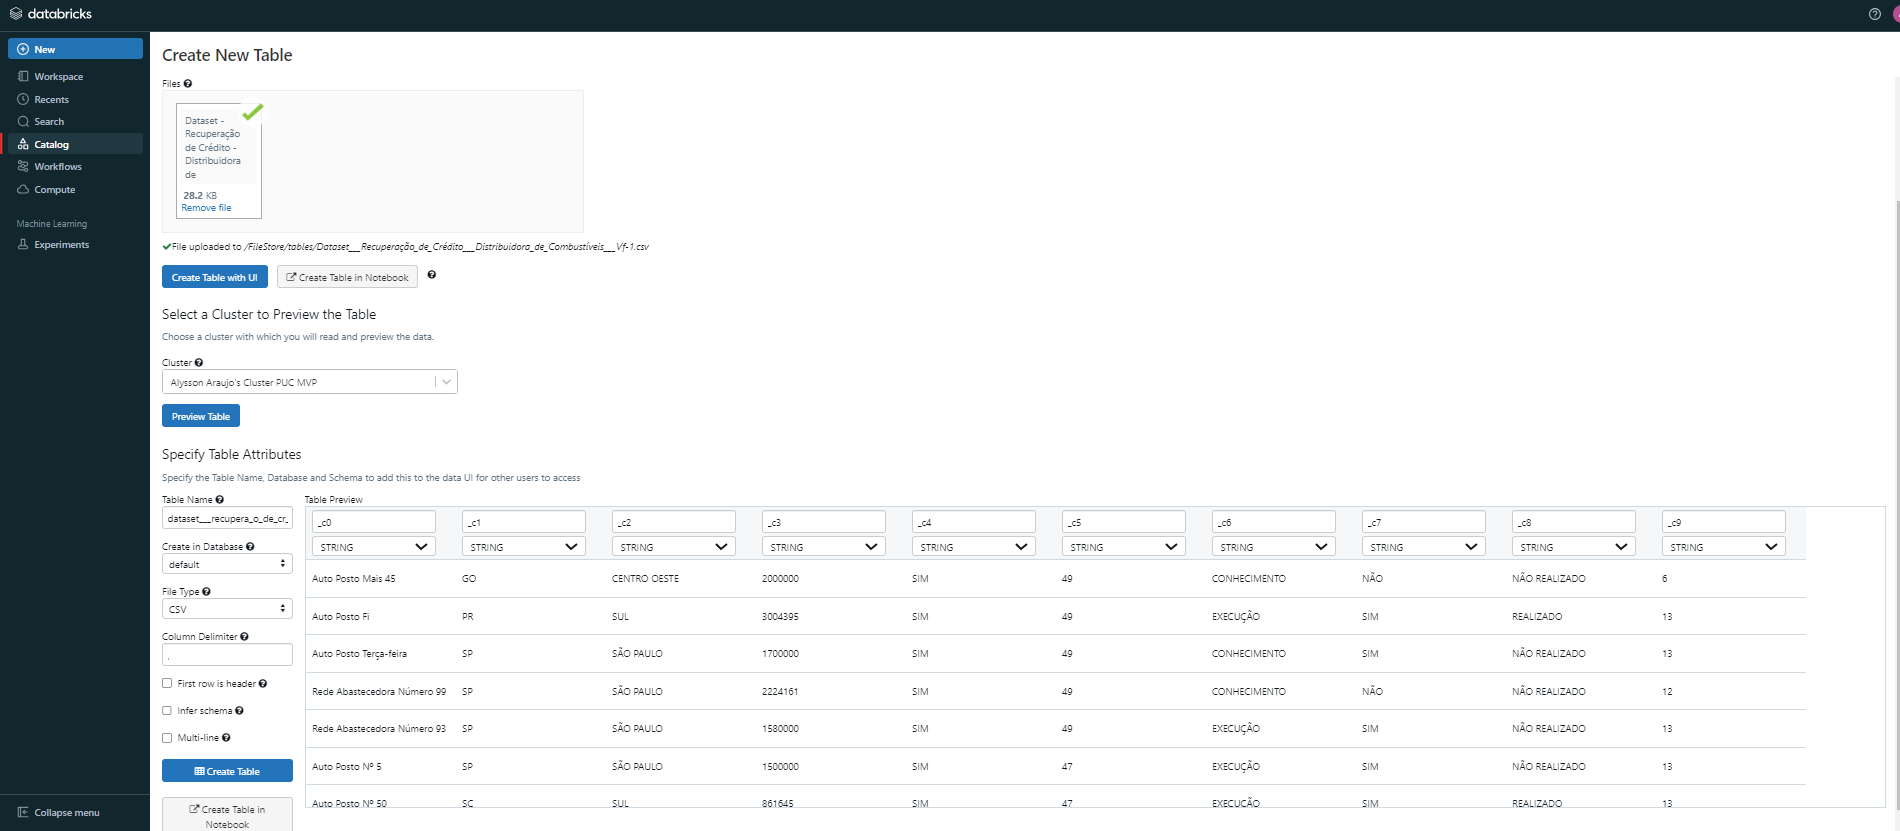

###4.3. Transformação dos Dados
Nesse caso foram necessárias apenas transformações simples. No criação da tabela no Databricks, todas as colunas de dados vieram categorizadas como “STRING”. No entanto, algumas colunas fazem referência a valores inteiros, e portanto foram ajustadas para “INT”, conforme imagem abaixo:
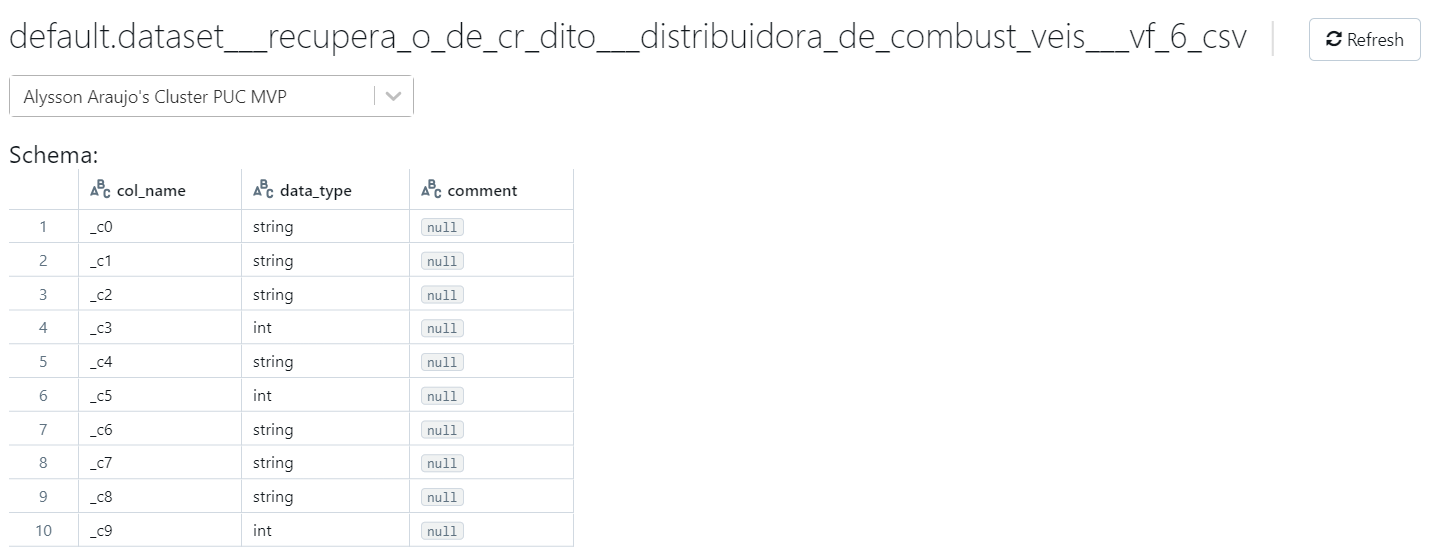

Ademais, ainda no âmbito da transformação/modelagem, definimos o nome das colunas conforme o dataset original, cujas descrições já foram feitas no catálogo proposto:

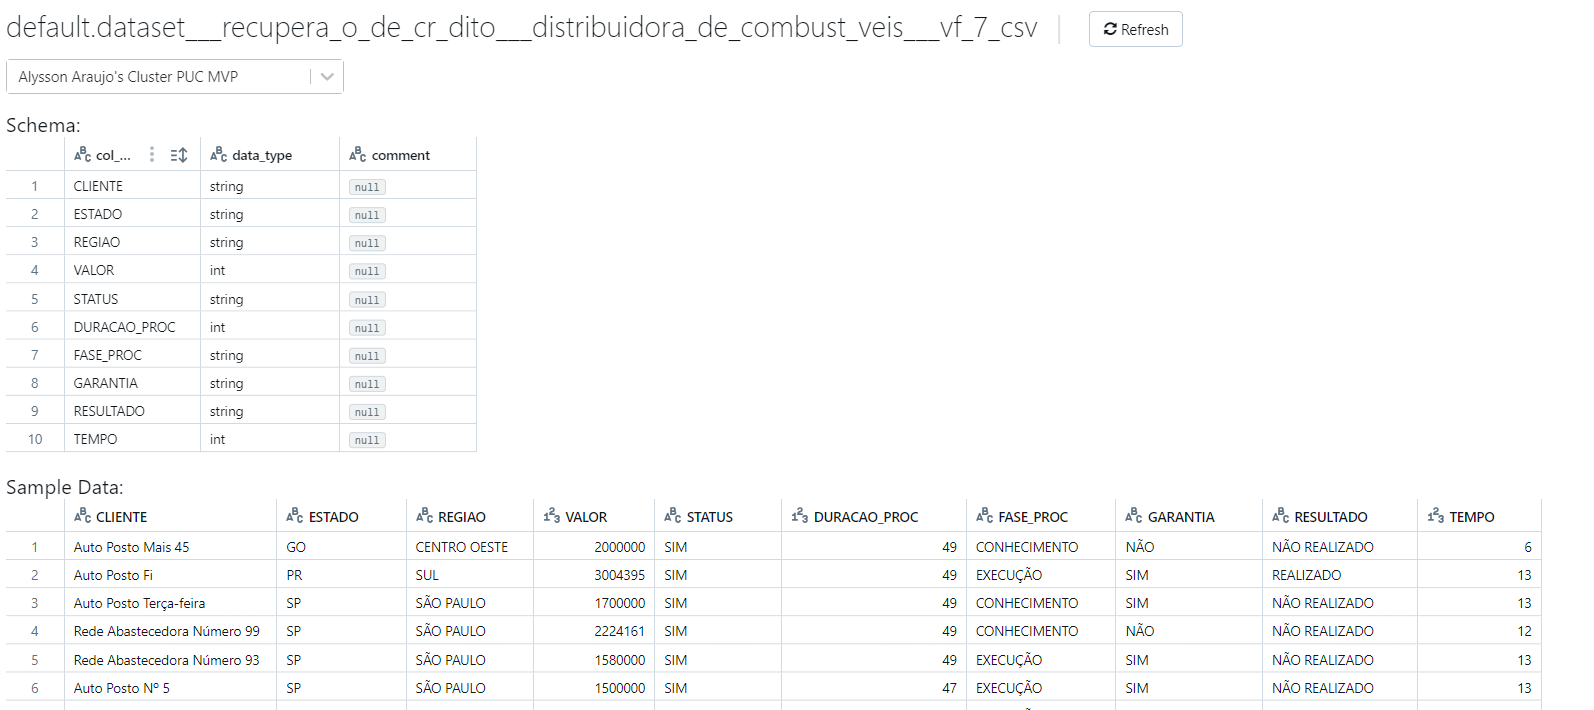

###4.4.	Carga dos Dados
Abaixo, temos um registro de imagem do estado final do carregamento dos dados do dataset no Databricks.
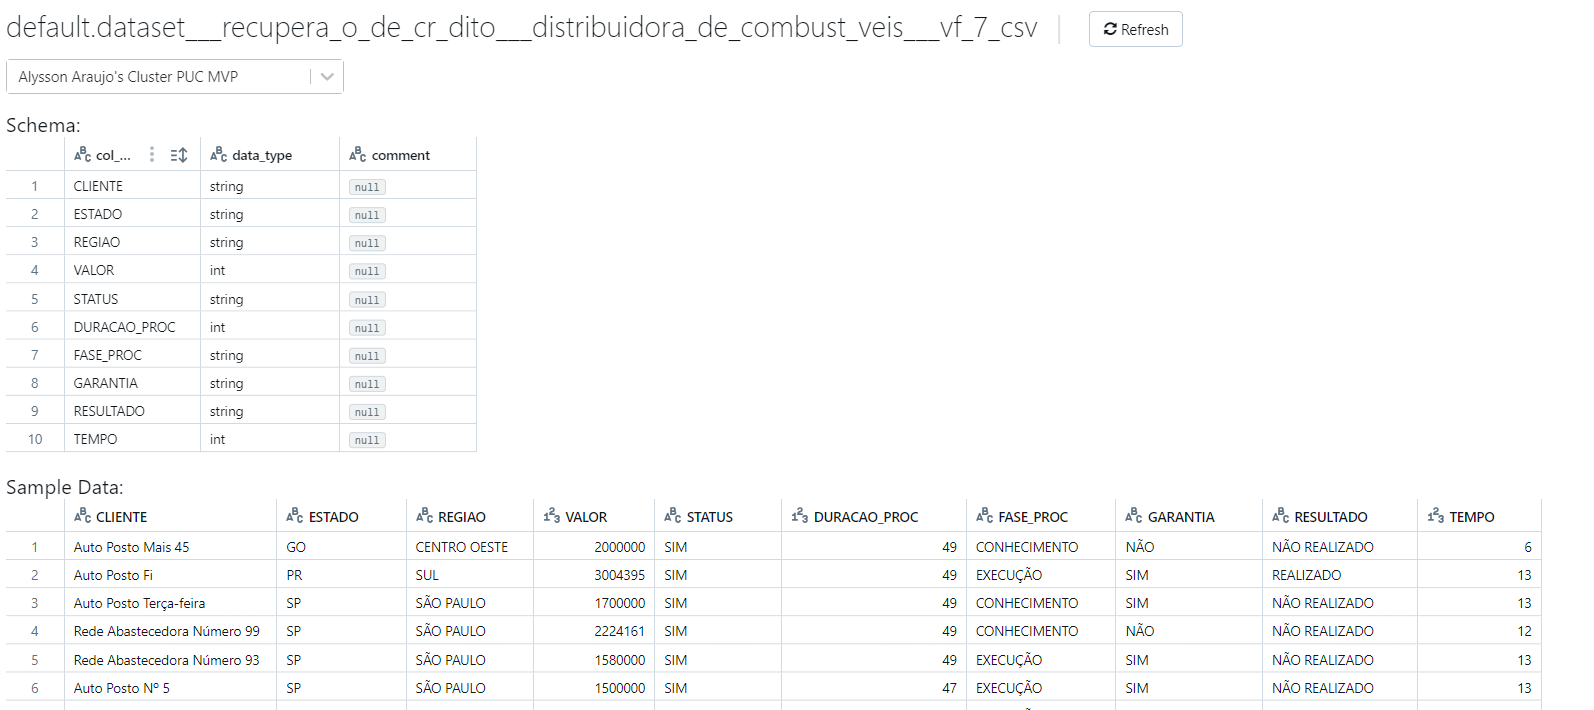

##5. Análise de dados

### 5.1. Importações
Nessa etapa, vamos fazer as importações necessárias para a análise de dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/alyssonfa/datasciencepucrio/main/Dataset%20-%20Recupera%C3%A7%C3%A3o%20de%20Cr%C3%A9dito%20-%20Distribuidora%20de%20Combust%C3%ADveis%20-%20Vf.csv"

# Informa o cabeçalho das colunas
colunas = ['CLIENTE', 'ESTADO', 'REGIAO', 'VALOR', 'STATUS', 'DURACAO_PROC', 'FASE_PROC', 'GARANTIA', 'RESULTADO', 'TEMPO']

# Nomeando a primeira versão do carregamento do meu dataset, e determinando a leitura do arquivo utilizando as colunas informadas
fda = pd.read_csv(url, names=colunas, delimiter=',')

In [4]:
fda.head(5)

,CLIENTE,ESTADO,REGIAO,VALOR,STATUS,DURACAO_PROC,FASE_PROC,GARANTIA,RESULTADO,TEMPO
0,Auto Posto Mais 45,GO,CENTRO OESTE,2000000,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,6
1,Auto Posto Fi,PR,SUL,3004395,SIM,49,EXECUÇÃO,SIM,REALIZADO,13
2,Auto Posto Terça-feira,SP,SÃO PAULO,1700000,SIM,49,CONHECIMENTO,SIM,NÃO REALIZADO,13
3,Rede Abastecedora Número 99,SP,SÃO PAULO,2224161,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,12
4,Rede Abastecedora Número 93,SP,SÃO PAULO,1580000,SIM,49,EXECUÇÃO,SIM,NÃO REALIZADO,13


A disposição dos cabeçalhos ocorreu de forma como esperado. Em seguida, passamos à análise de dados propriamente dita.

### 5.2. Estatísticas Descritivas

Iniciamos com a análise das estatísticas descritivas simples, como (i) a quantidade de atributos e instâncias; (ii) os tipos de atributos, e se há algum faltante; (iii) análise visual das primeiras e últimas 10 linhas de do dataframe, e o resumo estatístico dos atributos de valores numéricos. Em seguida, traremos algumas conclusões iniciais.

#### 5.2.1. Dimensão do dataset

In [5]:
# Mostra as dimensões do dataset
print(fda.shape)

(355, 10)


A resposta nos mostra que estamos lidando com um dataset que conta com 10 colunas e 355 linhas.

#### 5.2.2. Informações do dataset

In [6]:
# Mostra as informações do dataset
print(fda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CLIENTE       355 non-null    object
 1   ESTADO        355 non-null    object
 2   REGIAO        355 non-null    object
 3   VALOR         355 non-null    int64 
 4   STATUS        355 non-null    object
 5   DURACAO_PROC  355 non-null    int64 
 6   FASE_PROC     355 non-null    object
 7   GARANTIA      355 non-null    object
 8   RESULTADO     355 non-null    object
 9   TEMPO         355 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 27.9+ KB
None


Podemos observar uma maioria de atributos do tipo categórico, e apenas 3 numéricos, como já demonstrado.

Tambem podemos perceber que não há missings em nosso dataset.

Aqui, poderíamos ter usado o comando '.dtypes', mas o '.info' nos traz uma quantidade de informações mais completa, e não apenas os tipos dos atributos.

#### 5.2.3. Primeiras e últimas 10 linhas do dataset

In [7]:
# Mostra as 10 primeiras linhas do dataset
fda.head(10)

,CLIENTE,ESTADO,REGIAO,VALOR,STATUS,DURACAO_PROC,FASE_PROC,GARANTIA,RESULTADO,TEMPO
0,Auto Posto Mais 45,GO,CENTRO OESTE,2000000,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,6
1,Auto Posto Fi,PR,SUL,3004395,SIM,49,EXECUÇÃO,SIM,REALIZADO,13
2,Auto Posto Terça-feira,SP,SÃO PAULO,1700000,SIM,49,CONHECIMENTO,SIM,NÃO REALIZADO,13
3,Rede Abastecedora Número 99,SP,SÃO PAULO,2224161,SIM,49,CONHECIMENTO,NÃO,NÃO REALIZADO,12
4,Rede Abastecedora Número 93,SP,SÃO PAULO,1580000,SIM,49,EXECUÇÃO,SIM,NÃO REALIZADO,13
5,Auto Posto Nº 5,SP,SÃO PAULO,1500000,SIM,47,EXECUÇÃO,SIM,NÃO REALIZADO,13
6,Auto Posto Nº 50,SC,SUL,861645,SIM,47,EXECUÇÃO,SIM,REALIZADO,13
7,Auto Posto Nº 63,SP,SÃO PAULO,200000,NÃO,47,EXECUÇÃO,NÃO,NÃO REALIZADO,13
8,Rede Abastecedora Número 101,PA,NORTE,1750000,SIM,47,EXECUÇÃO,SIM,REALIZADO,8
9,Auto Posto Nº 10,GO,CENTRO OESTE,1350000,SIM,47,EXECUÇÃO,SIM,REALIZADO,12


In [8]:
# Mostra as 10 últimas linhas do dataset
fda.tail(10)

,CLIENTE,ESTADO,REGIAO,VALOR,STATUS,DURACAO_PROC,FASE_PROC,GARANTIA,RESULTADO,TEMPO
345,Rede Abastecedora Número 3,RS,SUL,209000,SIM,13,EXECUÇÃO,SIM,REALIZADO,1
346,Auto Posto Nº 73,SP,SÃO PAULO,202000,NÃO,13,EXECUÇÃO,NÃO,NÃO REALIZADO,3
347,Auto Posto Mais 60,SP,SÃO PAULO,174000,NÃO,13,EXECUÇÃO,NÃO,NÃO REALIZADO,3
348,Auto Posto Nº 23,RN,NORDESTE,104000,NÃO,13,EXECUÇÃO,SIM,REALIZADO,3
349,Auto Posto Nº 66,MG,SUDESTE,424080,SIM,13,CONHECIMENTO,SIM,NÃO REALIZADO,2
350,Auto Posto Mais 83,PR,SUL,150000,SIM,13,EXECUÇÃO,SIM,REALIZADO,2
351,Rede Abastecedora Número 41,SP,SÃO PAULO,115854,NÃO,13,EXECUÇÃO,SIM,REALIZADO,2
352,Rede Abastecedora Número 92,SP,SÃO PAULO,109000,NÃO,13,CONHECIMENTO,NÃO,REALIZADO,2
353,Rede Abastecedora Número 38,RJ,SUDESTE,121600,NÃO,13,EXECUÇÃO,NÃO,REALIZADO,1
354,Rede Abastecedora Número 31,MG,SUDESTE,102868,NÃO,13,EXECUÇÃO,NÃO,REALIZADO,1


Visualizando as primeiras e últimas 10 linhas, podemos verificar a maioria de atributos categóricos descrito no comando '.info', utilizado anteriormente. Ademais, a visualização dos dados está correta, na forma como esperado.

#### 5.2.4. Resumo estatístico do dataset

In [9]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
fda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VALOR,355.00,"623,825.30","815,703.84","100,000.00","150,000.00","307,639.00","750,000.00","5,226,514.00"
DURACAO_PROC,355.00,30.36,10.91,13.00,20.00,32.00,39.00,49.00
TEMPO,355.00,6.81,3.37,1.00,5.00,6.00,9.00,13.00


Fizemos o resumo estatístico dos atributos numéricos. Ajustei de forma horizontal, pois acredito ser mais agradável visualmente.

**VALOR**: Podemos perceber que o valor máximo se encontra muito distante do 3º quartil. Ou seja, 75% dos valores negociados estão abaixo de R$ 750.000,00, o valor máximo distoa bastante, podendo ser um possível outlier. Quanto ao valor mínimo, temos um número bem próximo do 1º quartil, não havendo tal distorção.

**DURACAO_PROC**: Aqui, os dados parecem ter uma distribuição razoavelmente simétrica, concentrando-se em torno da média de 30,36. No entanto, a presença de um desvio padrão relativamente alto sugere uma dispersão significativa dos valores, indicando que a variabilidade dos dados é considerável. Considerando que tais valores estão em meses, podemos dizer que a maioria dos processos já dura mais de 2 anos, e estão, no mínimo tramitando há 1 ano e 1 mês.

**TEMPO**: Para esse atributo, os dados indicam uma tendência central mais baixa, com uma dispersão moderada, uma vez que o desvio padrão é de 3,37, consideravelmente menor do que o encontrado no atributo DURACAO_PROC. Nesse caso, temos uma realidade em que 75% das negociações são finalizadas em 9 meses ou menos, demonstrando que poucas negociações chegam a completar 1 ano.

#### 5.2.5. Distribuição das classe do dataset

Como os atributos categóricos não possibilitam um resumo estatístico na forma como os atributos numéricos, resolvi verificar a distribuição das classes, para verificar eventual problema de balanceamento.

In [10]:
print(fda.groupby('RESULTADO').size())

RESULTADO
NÃO REALIZADO     94
REALIZADO        261
dtype: int64


Podemos observar um desequilíbrio entre as classes "REALIZADO" e "NÃO REALIZADO". Essa discrepância na distribuição das classes pode impactar o desempenho de modelos de aprendizado de máquina, especialmente aqueles sensíveis ao desequilíbrio de classes.

In [11]:
print(fda.groupby('GARANTIA').size())

GARANTIA
NÃO    124
SIM    231
dtype: int64


Aqui temos um desequilíbrio menor do que no atributo anterior, mas ainda assim vemos um desequilíbrio que pode impactar o desempenho de modelos de aprendizado de máquina.

In [12]:
print(fda.groupby('STATUS').size())

STATUS
NÃO    142
SIM    213
dtype: int64


Aqui temos o menor desequilíbrio do dataset.

In [13]:
print(fda.groupby('FASE_PROC').size())

FASE_PROC
CONHECIMENTO    104
EXECUÇÃO        251
dtype: int64


Nesse caso, também vemos um desequilíbrio.

Precisamos verificar qual dessas classes deve ter seu problema de desbalanceamento resolvido, pois muitas delas não serão 'outputs' de um modelo de machine learning, mas sim uma variável de 'imput'. Como o objetivo do modelo é responder, mediante a alimentação dos dados, se um acordo será provavelmente REALIZADO ou NÃO REALIZADO, e em quantos meses a negociação demoraria, entedemos que a classe que precisa de uma correção quanto ao seu balanceamento é a "RESULTADO".

####5.2.6. Conclusão sobre a qualidade dos dados
Com a análise iniciada, podemos concluir que se trata de um dataset sem missings, com dados coerentes com as atividades mapeadas, e que poderá nos possibilitar uma boa análise de dados com boas visualizações. Como dito, problemas de desbalanceamento poderão comprometer a utilização do dataset para fins de aprendizado de máquina. No entanto, o objetivo deste trabalho não incluirá a solução para esse problema.

### 5.3. Visualizações

Nesse tópico vamos observar algumas visualizações que entendi serem interessantes para uma análise estatística e comercial dos dados dos acordos. Para isso vamos utilizar histogramas, gráficos de densidade, boxplots, dispersão, barra, misto, pizza e outros.

#### 5.3.1 Histograma

Vamos iniciar utilizando um histograma, para analisar a distribuição dos dados, fornecendo uma representação visual das frequências ou densidades em diferentes intervalos.

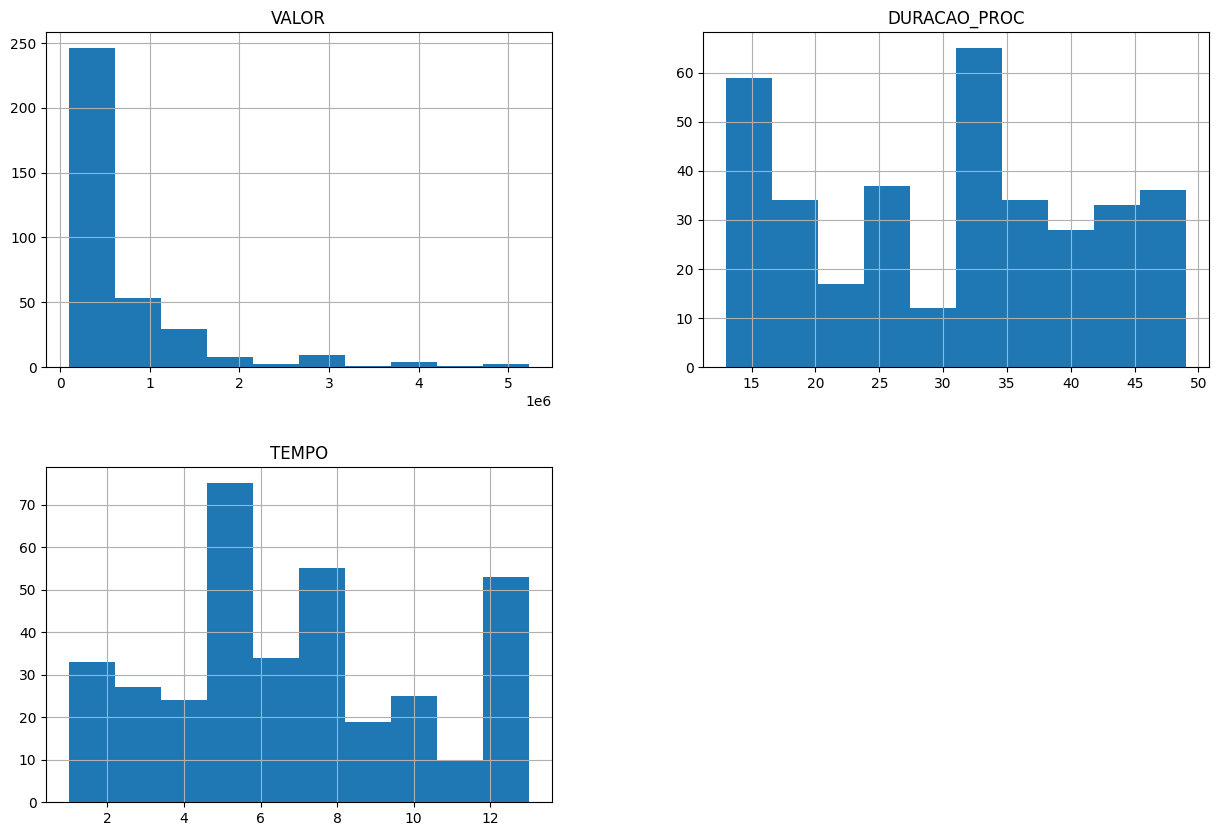

In [14]:
# Histograma
fda.hist(figsize = (15,10))
plt.show()

**VALOR**: Aqui temos um histograma distorcido, com uma distribuição exponencial, e uma concentração massiva de acordos com valores menores de 1 milhão de reais. É possível perceber algo que já haviamos sugerido anteriormente: a prensença de possíveis outliers, considerando as ocorrências entre 2 milhoes e 5 milhões de reais.

**DURACAO_PROC**: Aqui conseguimos verificar o aparecimento de dois picos, o que torna esse histograma bimodal, com concentração de frequência destacados entre a duração de 15 a 20 meses, e 30 a 35 meses.

**TEMPO**: Aqui, temos o aparecimento de ao menos 3 picos, o que torna esse histograma multimodal. Aqui vemos que os dados são heterogeneos, os 3 picos mostram uma possível existência de clusters ou subgrupos.

#### 5.3.2 Gráfico de densidade

Um gráfico de densidade é útil para visualizar a distribuição de probabilidade contínua de dados, proporcionando insights detalhados sobre a forma e concentração dos valores ao longo de uma escala.

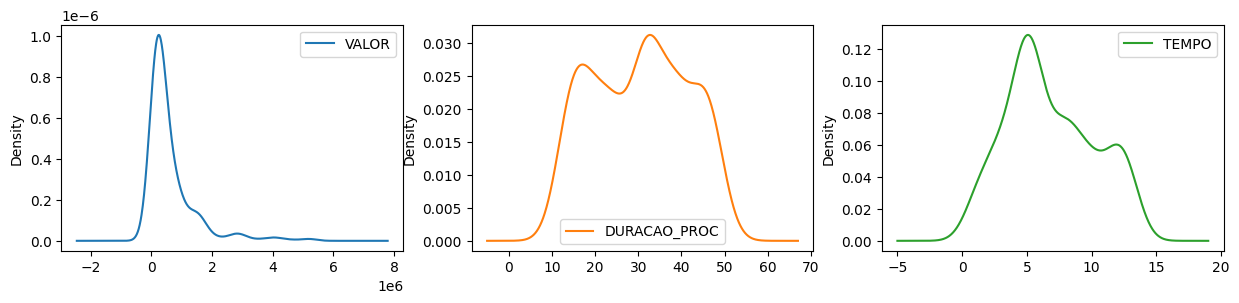

In [15]:
# Density Plot
fda.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Os resultados desses gráficos confirmam as informações obtidas por meio dos histogramas. Na verdade, quanto ao gráfico referente ao atributo Valor, vemos com ainda mais clareza sua exponencialidade e desequilíbrio. Os demais não mostram uma distribuição normal, mas nada que impacte severamente a análise, como o gráfico de valor.

#### 5.3.3 Gráfico boxplot


O boxplot é útil para visualizar a distribuição estatística de um conjunto de dados, fornecendo informações sobre a mediana, quartis, dispersão e detecção de outliers de forma concisa e eficaz. Aqui, poderemos identificar com certeza e precisão a presença dos outliers que já sugerimos na análise dos gráficos anteriores.

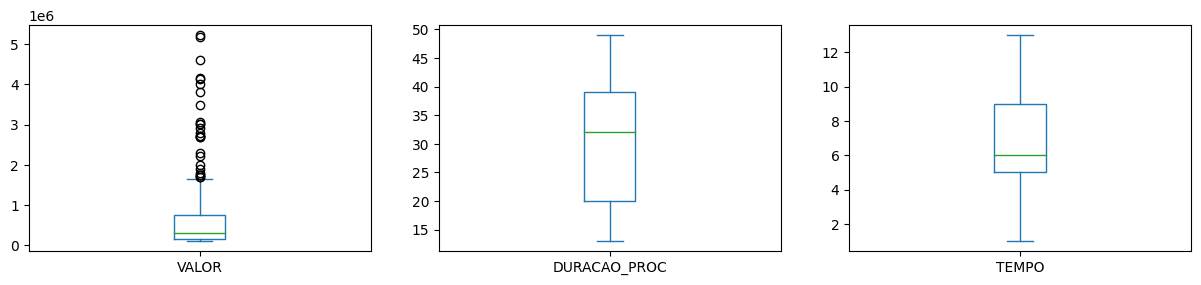

In [16]:
# Boxplot
fda.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()


**VALOR**: Temos um boxplot cuja variação entre a mínima e máxima é bem achatada, por conta da presença marcante de diversos outliers. Vemos que a maioria dos valores está abaixo de 2 mihões de reais, estando o 3º quartil abaixo de 1 milhão de reais. Nesse caso, está claro que esse atributo precisará passar por uma transformação na etapa de pré processamento de dados.

**DURACAO_PROC**: Vemos uma distribuição coerente, com uma mediana ligeiramente mais próxima do 3º quartil, do que do 1º quartil. As distâncias dos quartis para os valores máximo e mínimo estão relativamente equilibradas, mostrando uma distribuição razoável.

**TEMPO**: Nesse caso, temos uma mediana bem mais próxima do 1º quartil, mostrando que metade dos acordos são negociados em tempo menos do que 6 meses.As distâncias dos quartis para os valores máximo e mínimo estão relativamente equilibradas, mostrando uma distribuição razoável.

#### 5.3.4 Gráficos de dispersão

O gráfico de dispersão é útil para visualizar a relação entre duas variáveis, revelando padrões, tendências e identificando a presença de outliers em um conjunto de dados. Nesse caso, vamos focar em duas visualizações bastante úteis comercialmente: *(i)* Valor do acordo x Tempo de negociação x Resultado; *(ii)* Valor do acordo x Tempo de tramitação do processo judicial x Resultado.

**(i)** Valor do acordo x Tempo de negociação x Resultado

Para o primeiro gráfico, utilizamos um código que cria um gráfico de dispersão para visualizar a relação entre o valor do acordo e o tempo de negociação, colorindo os pontos de acordo com a categoria 'NÃO REALIZADO' ou 'REALIZADO'. Com isso podemos identificar alguma relação entre tais atributos.

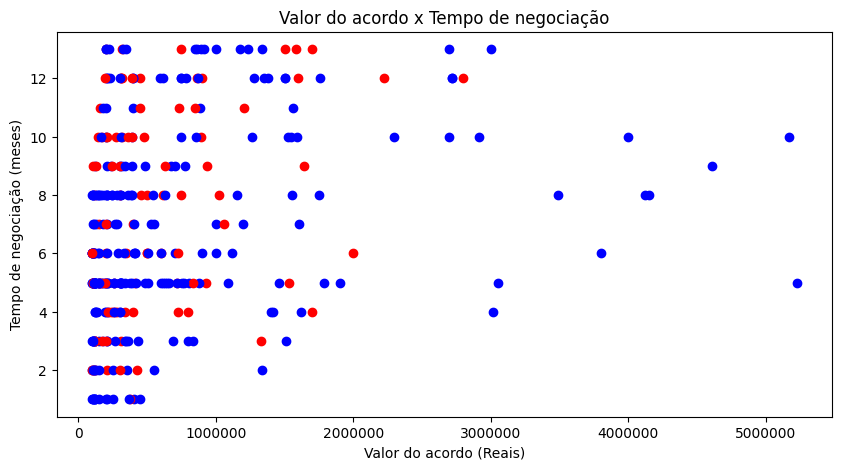

In [17]:
plt.figure(figsize=(10, 5))

# utilizando as cores para diferenciar os resultados
cores = {'NÃO REALIZADO':'r', 'REALIZADO':'b'}
for i in range(len(fda['RESULTADO'])):
  plt.scatter(fda['VALOR'][i], fda['TEMPO'][i],
              color=cores[fda['RESULTADO'][i]])

# título e nome dos eixos
plt.title('Valor do acordo x Tempo de negociação')
plt.xlabel('Valor do acordo (Reais)')
plt.ylabel('Tempo de negociação (meses)')

# retirando a notação científica
plt.ticklabel_format(style='plain', axis='x')

Com a leitura do gráfico, podemos perceber que, para valores acima de R$ 2.000.000,00 são necessários, no mínimo, 4 meses de negociação.

Também é possível observar que, muito embora estejam em menor quantidade, os casos com maiores valores envolvidos retornam negociações positivas, denotando que os maiores devedores, ao iniciar as negociações, tendem a acenar positivamente.

**(ii)** Valor do acordo x Tempo de tramitação do processo judicial x Resultado

Mais uma vez utilizamos um código que cria um gráfico de dispersão para visualizar a relação entre o valor do acordo e o tempo de tramitação do processo judicial, colorindo os pontos de acordo com a categoria 'NÃO REALIZADO' ou 'REALIZADO'. Com isso podemos identificar alguma relação entre tais atributos.

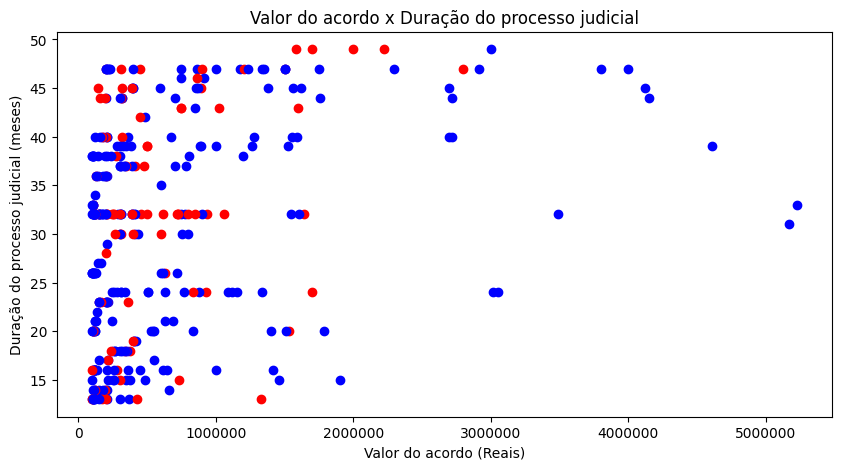

In [18]:
plt.figure(figsize=(10, 5))

# utilizando as cores para diferenciar os resultados
cores = {'NÃO REALIZADO':'r', 'REALIZADO':'b'}
for i in range(len(fda['RESULTADO'])):
  plt.scatter(fda['VALOR'][i], fda['DURACAO_PROC'][i],
              color=cores[fda['RESULTADO'][i]])

# título e nome dos eixos
plt.title('Valor do acordo x Duração do processo judicial')
plt.xlabel('Valor do acordo (Reais)')
plt.ylabel('Duração do processo judicial (meses)')

# retirando a notação científica
plt.ticklabel_format(style='plain', axis='x')

Com uma análise inicial, é possível perceber maior concentração de acordos não realizados entre 25 e 40 meses de tramitação processual. Isso demonstra, em certa medida, que há uma tendência em se fazer acordos nos primeiros 2 anos de tramitação da ação, ou a partir dos 3 anos e 6 meses, aproximadamente. Entre as duas durações, há um volume maior de acordos não realizados.

#### 5.3.5 Gráfico pizza

Um gráfico de pizza é útil para representar a distribuição proporcional de categorias em um conjunto de dados. Ele proporciona uma visualização rápida das partes relativas do todo, destacando a contribuição percentual de cada categoria. Nesse caso, nossa utilização óbvia é mostrar qual a porcentagem de sucesso nas negociações de acordo analisadas.

Para isso, vamos criar um gráfico em pizza, com porcentagem e valor absoluto, entre os REALIZADOS e NÃO REALIZADOS, discriminados pelas cores azul e vermelho, respectivamente.








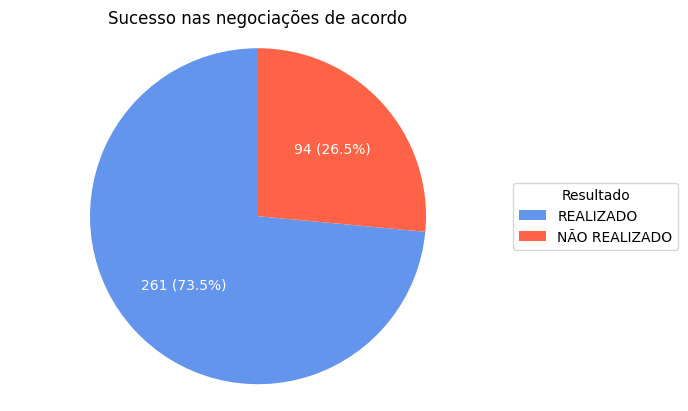

In [19]:
# Calcular a soma da coluna 'VALOR' para cada resultado
soma_valores_resultados = fda.groupby('RESULTADO')['VALOR'].sum()

# Contagem de realizados e não realizados
contagem_resultados = fda['RESULTADO'].value_counts()

# Criar o gráfico de pizza
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(contagem_resultados,
    autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(contagem_resultados) / 100, p),
    textprops=dict(color="w"), startangle=90, colors=['#6495ED', '#FF6347'])
ax.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo.

# Adicionar título
ax.set_title('Sucesso nas negociações de acordo')

# Adicionar legenda
ax.legend(wedges, contagem_resultados.index, title='Resultado',
          loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Exibir o gráfico
plt.show()

Nesse caso, a conclusão é simples: há uma porcentagem de sucesso de 73,5 % das negociações.

#### 5.3.6 Gráficos de barras e mistos

Nessa etapa, vamos fazer uma análise cada vez mais comercial, ainda que prévia, dos dados disponibilizados. Dispusemos os gráficos da seguinte forma:

(i) Somatório dos Valores de Acordo x Região e Resultado

(ii) Negociações x Média de Tempo por Estado

(iii) Garantia x Resultado

(iv) Fase processual x Resultado

(v) Status do Posto de combustível x Resultado

**(i)** Somatório dos Valores de Acordo x Região e Resultado

Nesse gráfico, escolhemos a visualização de barras lado a lado, com a indicação, por região, dos acordos realizados e não realizados, em cores diferentes. Para auxiliar na percepção, colocamos em ordem descrescente, com os rótulos de valores sobre cada barra, e linhas de grade em cor suave.

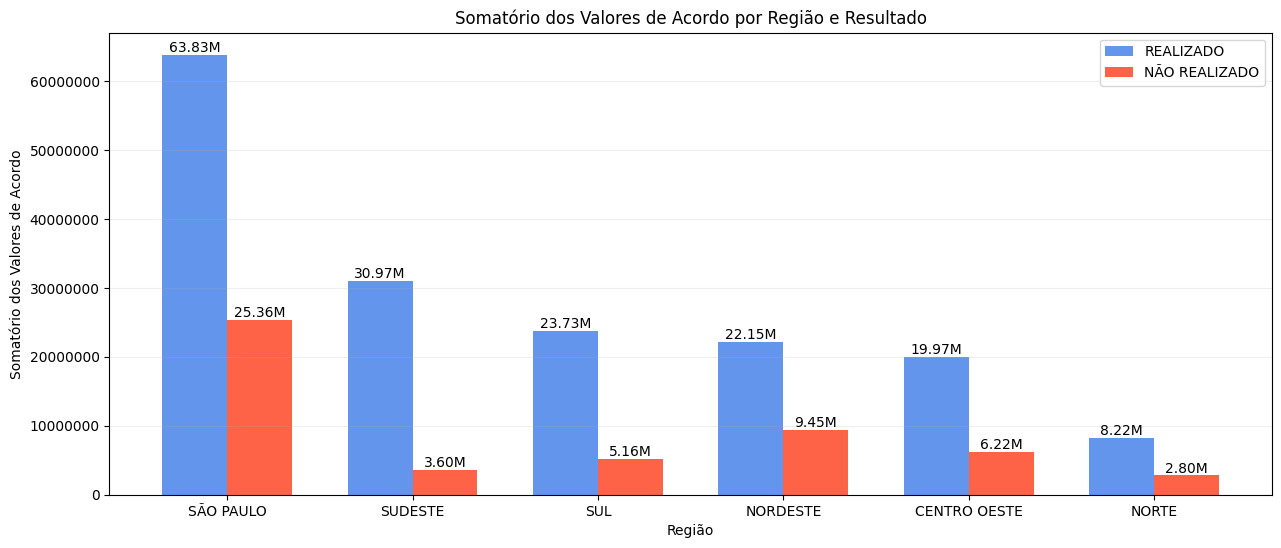

In [20]:
# Agrupar por região e calcular o somatório dos valores de acordo
agrupado = fda.groupby('REGIAO')['VALOR'].sum().reset_index()

# Criar um DataFrame com colunas 'REALIZADO' e 'NÃO REALIZADO'
# usando pivot_table
pivot_fda = fda.pivot_table(index='REGIAO', columns='RESULTADO', values='VALOR',
                            aggfunc='sum').reset_index()

# Ordenar o DataFrame pelo valor de 'REALIZADO' em ordem decrescente
pivot_fda = pivot_fda.sort_values(by='REALIZADO', ascending=False)

# Criar o gráfico de barras duplas
bar_width = 0.35
fig, ax = plt.subplots(figsize=(15, 6))

# Linhas de grade horizontais em cinza
ax.yaxis.grid(True, linestyle='-', alpha=0.2)

# Fazendo o ajuste manual da posição das barras para ficarem lado a lado,
# e colocando as cores azul e vermelho
bar_positions = range(len(pivot_fda['REGIAO']))
bar1 = ax.bar(bar_positions, pivot_fda['REALIZADO'], width=bar_width,
              label='REALIZADO', align='center', color='#6495ED')
bar2 = ax.bar([pos + bar_width for pos in bar_positions],
              pivot_fda['NÃO REALIZADO'], width=bar_width,
              label='NÃO REALIZADO', align='center', color='#FF6347')

# Adicionar rótulos e título ao gráfico
ax.set_xlabel('Região')
ax.set_ylabel('Somatório dos Valores de Acordo')
ax.set_title('Somatório dos Valores de Acordo por Região e Resultado')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(pivot_fda['REGIAO'])
ax.legend()

# Adicionar rótulos sobre as barras, com abreviação para que não fiquem rótulos muito extensos
for i, (val_realizado, val_nao_realizado) in enumerate(zip(pivot_fda['REALIZADO'],
                                                  pivot_fda['NÃO REALIZADO'])):
    ax.text(i, val_realizado, '{:.2f}M'.format(val_realizado / 1e6),
            ha='center', va='bottom')
    ax.text(i + bar_width, val_nao_realizado,
            '{:.2f}M'.format(val_nao_realizado / 1e6),
            ha='center', va='bottom')

# Retirando a notação científica
plt.ticklabel_format(style='plain', axis='y')

# Exibir o gráfico
plt.show()

Como já tratado anteriormente, temos a região referente ao estado de São Paulo com o maior valor de acordos realizados e não realizados. Embora seja o que tem maior valor e quantidade de acordos realizados, não esta região que tem a melhor taxa de sucesso nas negociações. Nesse caso, temos a região sudeste, que contempla, nesse caso, somente os estados do RJ, MG e ES, com uma proporção de valores referente a acordos realizados quase 10 vezes maior que os não realizados.

**(ii)** Negociações x Média de Tempo por Estado

Nesse gráfico, escolhemos a visualização mista de barras e linha, dessa vez sem a indicação de sucesso nos acordos. O objetivo aqui, é verificar o volume de casos por estado, e o tempo médio de negociação de acordo em cada um deles. Para isso, utilizamos as barras representando os estados, na cor azul, usando o eixo Y à esquerda para mostrar o número de negociações, e a linha representando a média de tempo por estado, na cor verde, usando o eixo Y à direita, mostrando as médias de tempo.

Resolvemos incluir linhas de grade apenas para o eixo Y relativo à média de tempo, pois preferimos não incluir o rótulo na linha, para não poluir a imagem. As barras contam com rótulos, e por isso não se fez necessária a linha de grade do eixo Y à esquerda.

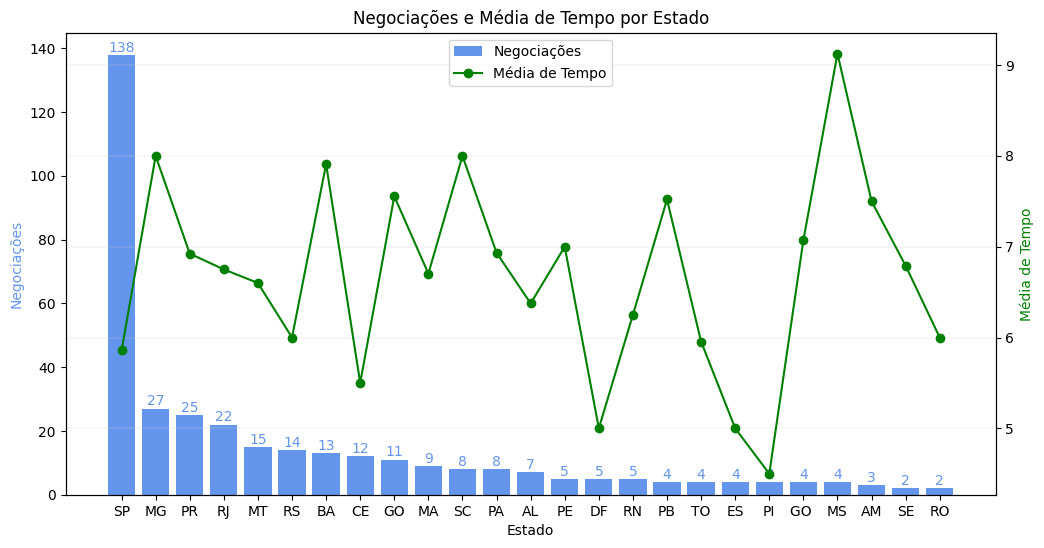

In [21]:
# Contagem de linhas por estado
contagem_estado = fda['ESTADO'].value_counts()

# Média de tempo por estado
media_tempo_estado = fda.groupby('ESTADO')['TEMPO'].mean()

# Ordenar o DataFrame pelo valor da contagem em ordem decrescente
contagem_estado = contagem_estado.sort_values(ascending=False)

# Plotar o gráfico misto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para a contagem de negociações por estado (em azul)
bar_positions = np.arange(len(contagem_estado))
ax1.bar(bar_positions, contagem_estado, color='#6495ED', label='Negociações')

# Adicionar rótulos e título para o primeiro eixo Y
ax1.set_xlabel('Estado')
ax1.set_ylabel('Negociações', color='#6495ED')
ax1.set_title('Negociações e Média de Tempo por Estado')

# Reindexar os rótulos do eixo X na ordem correta
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(contagem_estado.index, rotation=0, ha='center')

for i, v in enumerate(contagem_estado):
    ax1.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10,
             color='#6495ED')

# Criar o segundo eixo Y para a linha da média de tempo por estado (em verde)
ax2 = ax1.twinx()
ax2.plot(bar_positions, media_tempo_estado, color='green', marker='o',
         label='Média de Tempo')

# Adicionar linhas de grade em cinza claro
ax2.grid(color='lightgrey', linestyle='-', linewidth=0.25)

# Adicionar rótulos e título para o segundo eixo Y
ax2.set_ylabel('Média de Tempo', color='green')

# Adicionar legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

# Exibir o gráfico
plt.show()

Mais uma vez destacamos a concentração de negociações no estado de São Paulo, estando em segundo lugar o estado de Minas Gerais, com menos de 5 vezes o valor de São Paulo.

Percebemos também, que embora concentre a maioria das negociações, São Paulo tem uma média de tempo de negociação menor do que vários outros estados, estando acima apenas do Ceará, Distrito Federal, Espírito Santo e Piauí, respectivamente. Mato Grosso do Sul é o estado com maior tempo de negociação, em média.

**(iii)** Garantia x Resultado

Neste gráfico de barras empilhadas, poderemos ver a relação entre a existência de garantias contratuais, e o resultado das negociações.

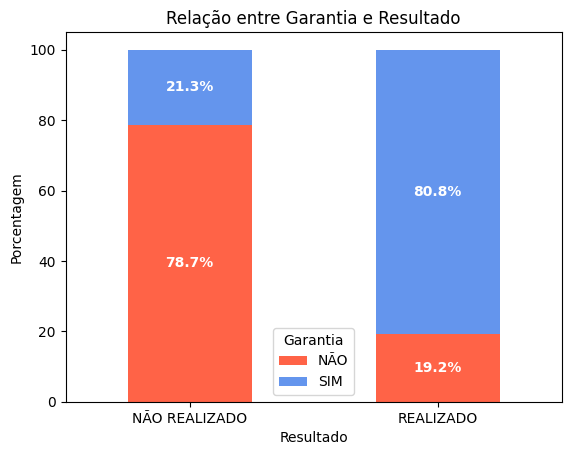

In [22]:
# Criar DataFrame com contagem de 'GARANTIA' para cada 'RESULTADO'
contagem_garantia_resultado = fda.groupby(['RESULTADO', 'GARANTIA']).size().unstack(fill_value=0)

# Normalizar os valores para obter porcentagens
contagem_garantia_resultado_percentual = contagem_garantia_resultado.div(contagem_garantia_resultado.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras empilhadas
fig, ax = plt.subplots()
contagem_garantia_resultado_percentual.plot(kind='bar', stacked=True, ax=ax, color=['#FF6347', '#6495ED'])

# Adicionar rótulos e título
ax.set_xlabel('Resultado')
ax.set_ylabel('Porcentagem')
ax.set_title('Relação entre Garantia e Resultado')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionar porcentagens às partes da barra
for i, resultado in enumerate(contagem_garantia_resultado_percentual.index):
    total_porcentagem = 0
    for j, garantia in enumerate(contagem_garantia_resultado_percentual.columns):
        porcentagem = contagem_garantia_resultado_percentual.loc[resultado, garantia]
        ax.text(i, total_porcentagem + porcentagem / 2, f'{porcentagem:.1f}%',
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        total_porcentagem += porcentagem

# Adicionar legenda
ax.legend(title='Garantia', loc='lower center')

# Exibir o gráfico
plt.show()

Podemos perceber, nitidamente, que mais de 80% dos acordos realizados advém de contratos comerciais com garantias. Enquanto nos não realizados, há uma predominância, quase em mesma medida, dos contratos sem garantias. Ou seja, para que haja uma taxa de sucesso maior, recomenda-se que todos os contratos comerciais tenham garantias, pois há uma probabilidade maior de negociação em caso de pendência judicial.

**(iv)** Fase processual x Resultado

Neste gráfico de barras empilhadas, poderemos ver a relação entre a Fase Processual, e o resultado das negociações.

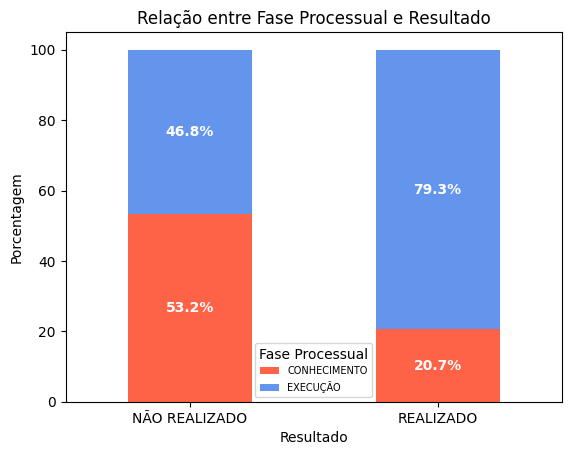

In [23]:
# Criar DataFrame com contagem de 'FASE_PROC' para cada 'RESULTADO'
contagem_fase_resultado = fda.groupby(['RESULTADO', 'FASE_PROC']).size().unstack(fill_value=0)

# Normalizar os valores para obter porcentagens
contagem_fase_resultado_percentual = contagem_fase_resultado.div(contagem_fase_resultado.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras empilhadas
fig, ax = plt.subplots()
contagem_fase_resultado_percentual.plot(kind='bar', stacked=True, ax=ax, color=['#FF6347', '#6495ED'])

# Adicionar rótulos e título
ax.set_xlabel('Resultado')
ax.set_ylabel('Porcentagem')
ax.set_title('Relação entre Fase Processual e Resultado')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionar porcentagens às partes da barra
for i, resultado in enumerate(contagem_fase_resultado_percentual.index):
    total_porcentagem = 0
    for j, garantia in enumerate(contagem_fase_resultado_percentual.columns):
        porcentagem = contagem_fase_resultado_percentual.loc[resultado, garantia]
        ax.text(i, total_porcentagem + porcentagem / 2, f'{porcentagem:.1f}%',
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        total_porcentagem += porcentagem

# Adicionar legenda
ax.legend(title='Fase Processual', loc='lower center', fontsize=7)

# Exibir o gráfico
plt.show()

Nesse caso, temos uma análise um pouco diferente. Podemos ver que quase 80% dos acordos realizados são feitos no âmbito de ações judiciais que já estão na fase de execução, ou seja, com possibilidade real e premente de constrições de bens patrimoniais do devedor. Nos não realizados, há um equilíbrio bastante consistente. Isso mostra que, nos acordos não realizados, há uma indiferença quanto à fase processual. Esse gráfico nos sugere uma outra forma de visualização, que seria a de Resultado por Fase Processual, que será feito em outra oportunidade, para melhor conclusão.

**(v)** Status do Posto de combustível x Resultado

Neste gráfico de barras empilhadas, poderemos ver a relação entre a o status de atividade do posto de combustível (ativo ou inativo), e o resultado das negociações.

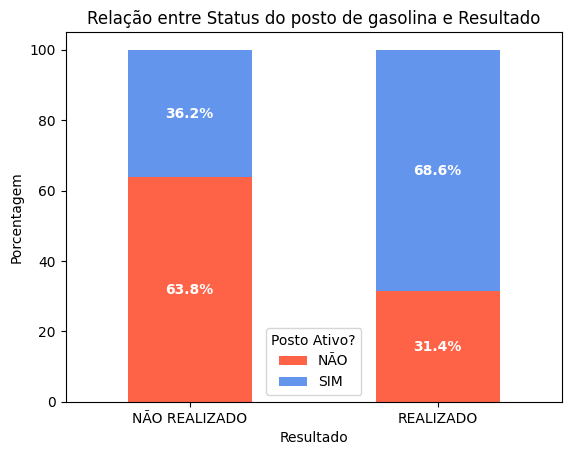

In [24]:
# Criar DataFrame com contagem de 'STATUS' para cada 'RESULTADO'
contagem_status_resultado = fda.groupby(['RESULTADO', 'STATUS']).size().unstack(fill_value=0)

# Normalizar os valores para obter porcentagens
contagem_status_resultado_percentual = contagem_status_resultado.div(contagem_status_resultado.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras empilhadas
fig, ax = plt.subplots()
contagem_status_resultado_percentual.plot(kind='bar', stacked=True, ax=ax, color=['#FF6347', '#6495ED'])

# Adicionar rótulos e título
ax.set_xlabel('Resultado')
ax.set_ylabel('Porcentagem')
ax.set_title('Relação entre Status do posto de gasolina e Resultado')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionar porcentagens às partes da barra
for i, resultado in enumerate(contagem_status_resultado_percentual.index):
    total_porcentagem = 0
    for j, garantia in enumerate(contagem_status_resultado_percentual.columns):
        porcentagem = contagem_status_resultado_percentual.loc[resultado, garantia]
        ax.text(i, total_porcentagem + porcentagem / 2, f'{porcentagem:.1f}%',
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        total_porcentagem += porcentagem

# Adicionar legenda
ax.legend(title='Posto Ativo?', loc='lower center')

# Exibir o gráfico
plt.show()

Nesse gráfico é possível perceber que há uma propensão maior de postos de combustível em operação em realizados acordos, do que os postos desativados. Isso chama a atenção para a necessidade buscar o acordo com o posto de combustível ainda em atividade, pois uma vez inativo, o potencial de acordo diminui bastante.

## 6. Conclusão

Vamos então às respostas às questões indicadas desde o início do trabalho:

1.	Qual a porcentagem de acordos realizados, em comparação com os não realizados?
**R:** Há uma porcentagem de sucesso de 73,5 % das negociações.

2.	Qual a região que apresenta o maior somatório financeiro em valores de acordos bem-sucedidos?
**R:** O estado de São Paulo conta com o maior valor de acordos realizados. Embora seja o que tem maior valor e quantidade de acordos realizados, não é esta região que tem a melhor taxa de sucesso nas negociações Nesse caso, temos a região sudeste, que contempla, nesse caso, somente os estados do RJ, MG e ES, com uma proporção de valores referente a acordos realizados quase 10 vezes maior que os não realizados.

3.	Quais estados apresentam, respectivamente, o maior e o menor tempo para finalização de uma negociação de acordo?
**R:** São Paulo tem uma média de tempo de negociação menor do que vários outros estados, estando acima apenas do Ceará, Distrito Federal, Espírito Santo e Piauí, respectivamente. Mato Grosso do Sul é o estado com maior tempo de negociação, em média.

4.	Qual a relação entre a existência de garantias contratuais e o sucesso de uma negociação?
**R:** Há uma relação direta entre a existência de garantias e o sucesso das negociações. Para que haja uma taxa de sucesso maior, recomenda-se que todos os contratos comerciais tenham garantias, pois há uma probabilidade maior de negociação em caso de pendência judicial.

Além dessas questões, podemos tirar outras interessantes do ponto de vista jurídico, financeiro e comercial:


*   75% dos valores negociados estão abaixo de R$ 750.000,00

*   a maioria dos processos já dura mais de 2 anos, e estão, no mínimo tramitando há 1 ano e 1 mês.

*   75% das negociações são finalizadas em 9 meses ou menos, demonstrando que poucas negociações chegam a completar 1 ano.

*   para valores acima de R$ 2.000.000,00 são necessários, no mínimo, 4 meses de negociação.

*   muito embora estejam em menor quantidade, os casos com maiores valores envolvidos retornam negociações positivas, denotando que os maiores devedores, ao iniciar as negociações, tendem a acenar positivamente.

*   há uma tendência em se fazer acordos nos primeiros 2 anos de tramitação da ação, ou a partir dos 3 anos e 6 meses, aproximadamente. Entre as duas durações, há um volume maior de acordos não realizados.

*   há uma porcentagem de sucesso de 73,5 % das negociações.

*   concentração de negociações no estado de São Paulo, estando em segundo lugar o estado de Minas Gerais, com menos de 5 vezes o valor de São Paulo.

*   há uma propensão maior de postos de combustível em operação em realizados acordos, do que os postos desativados. Isso chama a atenção para a necessidade buscar o acordo com o posto de combustível ainda em atividade, pois uma vez inativo, o potencial de acordo diminui bastante.







##7. Autoavaliação

Ao concluir este trabalho, posso refletir sobre a trajetória que percorri durante o módulo de pós-graduação em Engenharia de Dados. Vou detalhar minha autoavaliação em três partes: a realização dos objetivos delineados, as dificuldades encontradas e as possibilidades de trabalhos futuros para enriquecer o problema e a solução desenvolvida.

**Realização dos Objetivos**
Os objetivos delineados no início do trabalho eram claros e bem definidos. Desde o início, a meta era abordar um problema real de negócios utilizando uma abordagem de engenharia de dados completa. Consegui escolher um conjunto de dados relevante e aplicável, extraí-lo, transformei-o e carreguei-o na nuvem, culminando em uma análise detalhada. A construção de um modelo de dados, a documentação minuciosa através de um Catálogo de Dados e a implementação de uma pipeline de ETL no Databricks foram etapas críticas que me permitiram demonstrar a aplicação prática dos conceitos aprendidos.

**Dificuldades Encontradas**
Apesar do sucesso, a jornada não foi isenta de desafios.A configuração do ambiente no Databricks apresentou desafios técnicos. As limitações da versão Community Edition, como a capacidade reduzida do cluster, exigiram otimização cuidadosa dos processos para garantir que as operações fossem executadas sem problemas. A integração de diferentes ferramentas e bibliotecas em Python também foi um ponto de atenção, exigindo uma curva de aprendizado contínua.

Outro desafio significativo foi a necessidade de conciliar teoria e prática. Embora a teoria forneça uma base sólida, a aplicação prática muitas vezes revela nuances e complexidades não abordadas em material didático. Foi necessário adaptar estratégias e abordagens conforme surgiam novas demandas e problemas específicos do projeto.

**Trabalhos Futuros**
A experiência adquirida neste módulo de pós-graduação abre portas para diversos trabalhos futuros que podem enriquecer ainda mais a solução apresentada. Algumas possibilidades incluem:

Automatização Completa do Pipeline: Embora a pipeline de ETL tenha sido implementada com sucesso, a criação de um processo totalmente automatizado e escalável, capaz de lidar com grandes volumes de dados e fluxos contínuos, seria um passo natural e desejável.

Integração de Dados em Tempo Real: Explorar a integração de dados em tempo real utilizando tecnologias de streaming pode proporcionar insights mais imediatos e valiosos, especialmente em contextos de negócios onde a agilidade é crucial.

Aprimoramento da Qualidade de Dados: Desenvolver mecanismos avançados de validação e limpeza de dados para garantir ainda mais precisão e confiabilidade nas análises.

Análises Avançadas e Machine Learning: Aplicar técnicas de Machine Learning para prever tendências e comportamentos futuros baseados nos dados históricos, enriquecendo as capacidades analíticas e preditivas do sistema.

Expansão do Modelo de Dados: Ampliar o modelo de dados para incluir novas fontes e tipos de dados, possibilitando análises ainda mais abrangentes e detalhadas.

**Conclusão**
Em conclusão, a experiência adquirida ao longo deste módulo de pós-graduação em Engenharia de Dados foi inestimável. A realização dos objetivos delineados, apesar dos desafios encontrados, proporcionou um aprendizado profundo e prático. As dificuldades superadas fortaleceram minhas habilidades técnicas e de resolução de problemas, enquanto as possibilidades de trabalhos futuros oferecem um horizonte vasto e promissor para o contínuo aprimoramento e aplicação dos conhecimentos adquiridos. Este trabalho representa não apenas a conclusão de uma etapa acadêmica, mas também um marco significativo no desenvolvimento profissional como engenheiro de dados. Agradeço imensamente a todos os professores que disponibilizaram o seu conhecimento para o nosso aprimoramento.






